applying gaussian blur filter on masks

In [6]:
import os
import cv2

# Define the directories
input_dir = '/home/Hirra/DATASETS/validation_nwrd/merged_masks'  # Directory containing input mask images
output_dir = '/home/Hirra/DATASETS/NWRD_FINAL_Filtered_Masks_threshold9/val'  # Directory to store output mask images

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to apply Gaussian blur and then threshold to a mask image
def apply_gaussian_blur_and_threshold(image_path, output_path, kernel_size=(5, 5), sigma=0, threshold_value=9):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error reading image: {image_path}")
        return
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    
    # Apply threshold
    _, thresholded_image = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Save the thresholded image
    cv2.imwrite(output_path, thresholded_image)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        apply_gaussian_blur_and_threshold(input_path, output_path)

print("Processing complete. Check the output_masks directory.")


Processing complete. Check the output_masks directory.


Below is a Python script that takes the paths to two directories and an integer n, and copies n random files from the first directory to the second directory: fro ciriculum learning

In [ ]:
import os
import random
import shutil

def copy_random_files(source_dir, destination_dir, n):
    # Get list of files in source directory
    files = os.listdir(source_dir)
    
    # Choose n random files
    random_files = random.sample(files, min(n, len(files)))
    
    # Ensure destination directory exists
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    
    # Copy selected files to destination directory
    for file_name in random_files:
        source_file = os.path.join(source_dir, file_name)
        destination_file = os.path.join(destination_dir, file_name)
        shutil.move(source_file, destination_file)
        print(f"Copied {source_file} to {destination_file}")

# Example usage
source_directory = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/ciriculum_learning_2/non_rust"
destination_directory = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/ciriculum_learning_2/hard/non_rust"
num_files = 4413

copy_random_files(source_directory, destination_directory, num_files)


merges two masks together

In [2]:
import cv2
import numpy as np

# Load the two masks
mask1 = cv2.imread('/home/Hirra/other_datasets/NWRD_dataset/test/masks_new_fp/25_l1.png', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread('/home/Hirra/other_datasets/NWRD_dataset/test/masks/25.png', cv2.IMREAD_GRAYSCALE)

# Adjust threshold value based on the intensity distribution of the masks
# You may want to visualize histograms of the masks to determine a suitable threshold
threshold_value = 80

# Threshold the masks to create boolean arrays
mask1_bool = mask1 > threshold_value
mask2_bool = mask2 > threshold_value

# Combined mask using logical OR operation
combined_mask_bool = np.logical_or(mask1_bool, mask2_bool)

# Convert back to binary or 8-bit grayscale
combined_mask = combined_mask_bool.astype(np.uint8) * 255

# Save the combined mask as a PNG file
output_path = '/home/Hirra/other_datasets/NWRD_dataset/test/combined_mask2.png'
cv2.imwrite(output_path, combined_mask)

print("Combined mask saved as:", output_path)


Combined mask saved as: /home/Hirra/other_datasets/NWRD_dataset/test/combined_mask.png


In [2]:
import cv2
import numpy as np
import os

# Define the input directories for mask1 and mask2 and the output directory for combined masks
input_dir1 = '/home/Hirra/other_datasets/NWRD_updated/testmasks_original'
input_dir2 = '/home/Hirra/other_datasets/NWRD_updated/testmasks_new'
output_dir = '/home/Hirra/other_datasets/NWRD_updated/testcombined_masks'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all mask files in both directories
mask_files1 = sorted(os.listdir(input_dir1))
mask_files2 = sorted(os.listdir(input_dir2))

# Check that the two directories have the same number of files
if len(mask_files1) != len(mask_files2):
    raise ValueError("The two directories do not contain the same number of files")

# Loop through the files and process each pair
for mask_file1, mask_file2 in zip(mask_files1, mask_files2):
    # Construct the full file paths
    mask_path1 = os.path.join(input_dir1, mask_file1)
    mask_path2 = os.path.join(input_dir2, mask_file2)
    
    # Load the two masks
    mask1 = cv2.imread(mask_path1, cv2.IMREAD_GRAYSCALE)
    mask2 = cv2.imread(mask_path2, cv2.IMREAD_GRAYSCALE)
    
    if mask1 is None or mask2 is None:
        print(f"Error loading masks: {mask_file1}, {mask_file2}")
        continue
    
    # Convert to boolean for logical OR operation
    mask1_bool = mask1 > 80
    mask2_bool = mask2 > 80
    
    # Combined mask using logical OR operation
    combined_mask_bool = np.logical_or(mask1_bool, mask2_bool)
    
    # Convert back to binary or 8-bit grayscale (255 for white, 0 for black)
    combined_mask = combined_mask_bool.astype(np.uint8) * 255
    
    # Save the combined mask to the output directory
    output_path = os.path.join(output_dir, mask_file1)  # Assuming both dirs have matching filenames
    cv2.imwrite(output_path, combined_mask)

print("Processing complete. Combined masks are saved in the output directory.")


Processing complete. Combined masks are saved in the output directory.


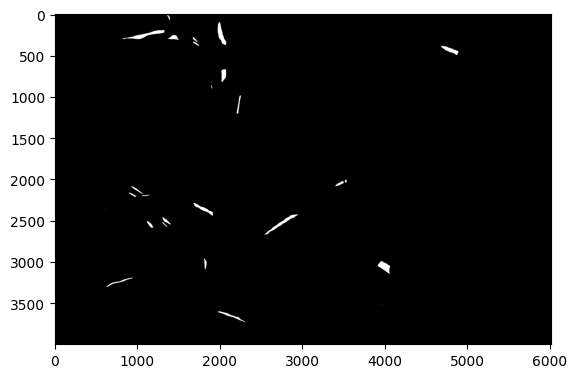

In [1]:
import cv2
import numpy as np

# Load the two masks
mask1 = cv2.imread('H:/Data/Data 2024/new_masks/testmasks', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread('H:/Data/Data 2024/new_masks/testmasks_new', cv2.IMREAD_GRAYSCALE)


# Convert to boolean for logical OR operation
mask1_bool = mask1 > 80
mask2_bool = mask2 > 80

# Combined mask using logical OR operation
combined_mask_bool = np.logical_or(mask1_bool, mask2_bool)

# Convert back to binary or 8-bit grayscale (255 for white, 0 for black)
combined_mask = combined_mask_bool.astype(np.uint8) * 255

# Displaying the result (requires matplotlib)
import matplotlib.pyplot as plt
plt.imshow(combined_mask, cmap='gray')
plt.show()

In [ ]:
import os
import cv2
import numpy as np

# Define the directories
input_dir1 = '/home/Hirra/other_datasets/NWRD_dataset/validation/masks'
input_dir2 = '/home/Hirra/DATASETS/val_masks_new'
output_dir = '/home/Hirra/DATASETS/val_masks_new/merged_masks'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to merge two masks
def merge_masks(mask1_path, mask2_path, output_path):
    mask1 = cv2.imread(mask1_path, cv2.IMREAD_GRAYSCALE)
    mask2 = cv2.imread(mask2_path, cv2.IMREAD_GRAYSCALE)
    
    if mask1 is None or mask2 is None:
        print(f"Error reading masks: {mask1_path}, {mask2_path}")
        return

    # Convert to boolean for logical OR operation
    mask1_bool = mask1 > 80
    mask2_bool = mask2 > 80

    # Combined mask using logical OR operation
    combined_mask_bool = np.logical_or(mask1_bool, mask2_bool)

    # Convert back to binary or 8-bit grayscale (255 for white, 0 for black)
    combined_mask = combined_mask_bool.astype(np.uint8) * 255

    # Save the combined mask
    cv2.imwrite(output_path, combined_mask)

# Process each mask in the input directories
for filename in os.listdir(input_dir1):
    mask1_path = os.path.join(input_dir1, filename)
    mask2_path = os.path.join(input_dir2, filename)
    
    if os.path.exists(mask2_path):
        output_path = os.path.join(output_dir, filename)
        merge_masks(mask1_path, mask2_path, output_path)
    else:
        print(f"Corresponding mask not found for: {filename}")

print("Processing complete. Check the merged_masks directory.")


Copy random n files from   one directoyr to another


In [3]:
import os
import random
import shutil

def select_random_images(source_dir, destination_dir, n):
    # Check if source directory exists
    if not os.path.isdir(source_dir):
        print(f"Source directory '{source_dir}' does not exist.")
        return

    # Create destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Get list of all files in source directory
    all_images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Check if there are enough images in the source directory
    if len(all_images) < n:
        print(f"Not enough images in '{source_dir}'.")
        return

    # Select n random images
    random_images = random.sample(all_images, n)

    # Copy selected images to destination directory
    for image in random_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(destination_dir, image)
        shutil.copyfile(source_path, destination_path)
        print(f"Image '{image}' copied to '{destination_dir}'.")

# Example usage
source_directory = "/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust"
destination_directory = "/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new"
number_of_images = 1566  # Change this to the number of images you want to select

select_random_images(source_directory, destination_directory, number_of_images)


Image '2091_crop_44.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '1521_crop_21.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '1783_crop_4.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '1881_crop_16.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '2283_crop_22.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '982_crop_29.jpg' copied to '/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_validation/rust_new'.
Image '335_crop_10.jpg' copied to '/media/tukl/2dceb8d

Code that takes input a directory that contains images. the code delete all images whose name starts with any of the following ["aug0", "aug1", "aug2"]

In [1]:
import os

def delete_images_by_prefix(directory, prefixes):
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the filename starts with any of the specified prefixes
        for prefix in prefixes:
            if filename.startswith(prefix):
                # Delete the image file
                os.remove(os.path.join(directory, filename))
                print(f"Deleted {filename}")

# Directory containing images
input_directory = "/media/tukl/2dceb8df-2a02-4725-92fb-525b406c4482/Hirra/other_datasets/CDTS_dataset/cdts_nonaug/cdts_training/non_rust"

# Prefixes to match for deleting images
prefixes = [ "aug1", "aug2", "aug3", "aug5", "aug6", "aug4","aug7" , "aug8",  "aug0"]

# Delete images from the directory based on the specified prefixes
delete_images_by_prefix(input_directory, prefixes)

print("Image deletion completed.")


Deleted aug1_251_crop_28.jpg
Deleted aug0_1093_crop_19.jpg
Deleted aug0_113_crop_17.jpg
Deleted aug0_1190_crop_20.jpg
Deleted aug1_1112_crop_16.jpg
Deleted aug1_1885_crop_21.jpg
Deleted aug0_1471_crop_17.jpg
Deleted aug0_1636_crop_17.jpg
Deleted aug0_1167_crop_9.jpg
Deleted aug0_1216_crop_27.jpg
Deleted aug2_1594_crop_8.jpg
Deleted aug2_1575_crop_16.jpg
Deleted aug2_1199_crop_37.jpg
Deleted aug2_1187_crop_22.jpg
Deleted aug2_2179_crop_15.jpg
Deleted aug1_381_crop_23.jpg
Deleted aug2_1899_crop_14.jpg
Deleted aug0_611_crop_16.jpg
Deleted aug0_2182_crop_17.jpg
Deleted aug0_1184_crop_10.jpg
Deleted aug1_1074_crop_10.jpg
Deleted aug1_1920_crop_28.jpg
Deleted aug2_52_crop_24.jpg
Deleted aug2_1631_crop_11.jpg
Deleted aug0_178_crop_12.jpg
Deleted aug1_1153_crop_10.jpg
Deleted aug2_18_crop_24.jpg
Deleted aug0_918_crop_31.jpg
Deleted aug2_930_crop_21.jpg
Deleted aug1_869_crop_13.jpg
Deleted aug0_1452_crop_24.jpg
Deleted aug0_1277_crop_15.jpg
Deleted aug1_1559_crop_12.jpg
Deleted aug2_1670_crop_8

Code that takes input two directories dir1, dir2. dir 1 contains images with names of the following structure (int1_int2.png). the code moves images with int1 to be either of the following to dir 2 {7, 22, 61, 84, 120}. 

In [ ]:
import os
import shutil

def move_images_by_prefix(dir1, dir2, prefixes):
    # Ensure dir2 exists, create it if not
    if not os.path.exists(dir2):
        os.makedirs(dir2)

    # Iterate over files in dir1
    for filename in os.listdir(dir1):
        if filename.endswith('.png'):
            # Extract int1 from the filename
            int1 = int(filename.split('_')[0])

            # Check if int1 matches any of the specified prefixes
            if int1 in prefixes:
                # Move the image to dir2
                shutil.move(os.path.join(dir1, filename), os.path.join(dir2, filename))
                print(f"Moved {filename} to {dir2}")

# Directory containing images with specified filenames
dir1 = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/augmented_training (copy)/images"

# Directory to move matching images to
dir2 = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/augmented_NWRD(training_validation)/validation/images"

# Integers to match for moving images
prefixes = [7, 22, 61, 84, 120]

# Move images from dir1 to dir2 based on the specified prefixes
move_images_by_prefix(dir1, dir2, prefixes)

print("Image relocation completed.")


 Takes input a directory containing sub directories. the sub direcotries contains images. The code should move the images to the parent directory and delete the sub direcotries

In [2]:
import os
import shutil

def move_images_and_remove_subdirectories(directory):
    # Iterate over subdirectories in the given directory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            # Iterate over files in the subdirectory
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)
                # Move files to the parent directory
                shutil.move(file_path, os.path.join(directory, subdir+"_"+file_name))
            # Remove the subdirectory
            os.rmdir(subdir_path)

# Directory containing subdirectories with images
input_directory = "/home/Hirra/SegFormer/data/training/masks"

# Move images and remove subdirectories
move_images_and_remove_subdirectories(input_directory)

print("Images moved to parent directory and subdirectories deleted successfully.")


Images moved to parent directory and subdirectories deleted successfully.


In [8]:
import os

def rename_images(directory):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Iterate through each file
    for filename in files:
        # Check if the file starts with "images_name"
        if filename.startswith("images_"):
            # Construct the new filename by removing "images_" prefix
            new_filename = filename.replace("images_", "")
            
            # Construct the full paths for the original and new files
            original_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(original_path, new_path)
            print(f"Renamed: {filename} -> {new_filename}")

# Example usage:
# Replace 'path_to_directory' with the path to your directory containing the images
directory_path = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/NWRD-classifier/training/non_rust'
rename_images(directory_path)


Renamed: images_30_377.png -> 30_377.png
Renamed: images_124_260.png -> 124_260.png
Renamed: images_30_120.png -> 30_120.png
Renamed: images_12_220.png -> 12_220.png
Renamed: images_64_280.png -> 64_280.png
Renamed: images_21_88.png -> 21_88.png
Renamed: images_118_209.png -> 118_209.png
Renamed: images_95_32.png -> 95_32.png
Renamed: images_2_230.png -> 2_230.png
Renamed: images_133_26.png -> 133_26.png
Renamed: images_9_351.png -> 9_351.png
Renamed: images_140_73.png -> 140_73.png
Renamed: images_58_261.png -> 58_261.png
Renamed: images_85_276.png -> 85_276.png
Renamed: images_119_155.png -> 119_155.png
Renamed: images_109_239.png -> 109_239.png
Renamed: images_75_184.png -> 75_184.png
Renamed: images_26_189.png -> 26_189.png
Renamed: images_32_198.png -> 32_198.png
Renamed: images_14_373.png -> 14_373.png
Renamed: images_10_143.png -> 10_143.png
Renamed: images_11_97.png -> 11_97.png
Renamed: images_76_8.png -> 76_8.png
Renamed: images_100_148.png -> 100_148.png
Renamed: images_30_4

Python script that takes in a directory containing images and an integer, then deletes the excess images so that the number of images in the directory matches the integer

In [ ]:
import os
import glob

def delete_extra_images(directory, target_count):
    # Get a list of all image files in the directory
    image_files = glob.glob(os.path.join(directory, '*.JPG')) + glob.glob(os.path.join(directory, '*.jpeg')) + glob.glob(os.path.join(directory, '*.png'))
    
    # Check if the number of images exceeds the target count
    if len(image_files) > target_count:
        # Calculate the number of images to delete
        num_to_delete = len(image_files) - target_count
        # Sort the images by modification time (oldest first)
        image_files.sort(key=os.path.getmtime)
        # Delete the extra images
        for i in range(num_to_delete):
            os.remove(image_files[i])
        print(f"{num_to_delete} images deleted.")
    elif len(image_files) < target_count:
        print("Warning: Number of images in directory is less than the target count.")

# Example usage
directory_path = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/NWRD-classifier/validation/non_rust'
target_image_count = 95  # Change this to the desired integer count

delete_extra_images(directory_path, target_image_count)


script that renames images in a folder whose names start with "dark_" and removes "dark_" from their names:

In [ ]:
import os

def rename_images(directory):
    # Get a list of all files in the directory
    files = os.listdir(directory)
    
    # Iterate through each file
    for filename in files:
        # Check if the file starts with "dark_"
        if filename.startswith("rust_"):
            # Construct the new filename by removing "dark_"
            new_filename = filename.replace("rust_", "")
            
            # Construct the full paths
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed '{filename}' to '{new_filename}'")

# Specify the directory containing the images
directory = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/augmented_training/masks"

# Call the function to rename images
rename_images(directory)


This code will iterate through all the files in the directory and rename them with the ".jpg" extension, regardless of their original extension.

In [5]:
import os

# Directory containing the images
directory = "/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset/cdts_testing_224_200pixels/rust/only_bnw"

# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the file has a .jpg or .png extension
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the new filename with the .jpg extension
        new_filename = os.path.splitext(filename)[0] + ".jpg"
        # Construct the full paths
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed '{filename}' to '{new_filename}'")


Renamed '2208_crop_10.jpg' to '2208_crop_10.jpg'
Renamed '1550_crop_31.jpg' to '1550_crop_31.jpg'
Renamed '1547_crop_22.jpg' to '1547_crop_22.jpg'
Renamed '1247_crop_13.jpg' to '1247_crop_13.jpg'
Renamed '19_crop_12.jpg' to '19_crop_12.jpg'
Renamed '828_crop_29.jpg' to '828_crop_29.jpg'
Renamed '1215_crop_16.jpg' to '1215_crop_16.jpg'
Renamed '1801_crop_19.jpg' to '1801_crop_19.jpg'
Renamed '593_crop_26.jpg' to '593_crop_26.jpg'
Renamed '2338_crop_31.jpg' to '2338_crop_31.jpg'
Renamed '2252_crop_9.jpg' to '2252_crop_9.jpg'
Renamed '248_crop_20.jpg' to '248_crop_20.jpg'
Renamed '970_crop_27.jpg' to '970_crop_27.jpg'
Renamed '463_crop_10.jpg' to '463_crop_10.jpg'
Renamed '1823_crop_24.jpg' to '1823_crop_24.jpg'
Renamed '452_crop_19.jpg' to '452_crop_19.jpg'
Renamed '1050_crop_10.jpg' to '1050_crop_10.jpg'
Renamed '1529_crop_14.jpg' to '1529_crop_14.jpg'
Renamed '2118_crop_33.jpg' to '2118_crop_33.jpg'
Renamed '1893_crop_2.jpg' to '1893_crop_2.jpg'
Renamed '719_crop_26.jpg' to '719_crop_2

this code will create cosaliency dataset.split images on the base of imageno. It creates multiple subfolderrs

In [6]:
#this code will create cosaliency dataset.split images on the base of imageno. It creates multiple subfolderrs

import os
import shutil

# Function to split images into folders based on image number
def split_images_into_folders(source_dir, destination_dir):
    # Create destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Iterate through files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith('.png'):
            image_no = filename.split('_')[0]  # Extract image number from filename
            if not image_no.isdigit():
                image_no = filename.split('_')[1]
            destination_subdir = os.path.join(destination_dir, image_no)

            # Create subdirectory if it doesn't exist
            if not os.path.exists(destination_subdir):
                os.makedirs(destination_subdir)

            # Move the image file to the respective subdirectory
            shutil.move(os.path.join(source_dir, filename), destination_subdir)


# Example usage
source_directory = '/home/Hirra/DATASETS/NWRD_cosaliency/val/masks'  # Update with your source directory containing images
destination_directory = '/home/Hirra/DATASETS/NWRD_cosaliency/val/masks'  # Update with your destination directory

split_images_into_folders(source_directory, destination_directory)


# This file takes input the direcotry containing subidirecotry for each image and then splits into 12 images per group


In [8]:
import os
import shutil

def organize_images(main_directory):
    # Ensure the main directory exists
    if not os.path.exists(main_directory):
        print(f"The specified main directory '{main_directory}' does not exist.")
        return

    # Get a list of subdirectories in the main directory
    subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

    # Process each subdirectory
    for subdir in subdirectories:
        subdir_path = os.path.join(main_directory, subdir)

        # Get a list of images in the subdirectory
        images = [f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        # Determine the number of images per subdirectory
        images_per_subdir = 12
        num_subdirectories = len(images) // images_per_subdir
        n=0
        # Create additional subdirectories if needed
        for i in range(num_subdirectories - 1):
            new_subdir_name = f"{subdir}_part{i + 1}"
            new_subdir_path = os.path.join(main_directory, new_subdir_name)

            # Create the new subdirectory
            os.makedirs(new_subdir_path)

            # Move images to the new subdirectory
            for j in range(images_per_subdir):
                old_image_path = os.path.join(subdir_path, images[n])
                new_image_path = os.path.join(new_subdir_path, images[n])
                shutil.move(old_image_path, new_image_path)
                n+=1

    print("Image organization complete.")

# Example usage:
main_directory = '/home/Hirra/DATASETS/NWRD_cosaliency/val/images'
organize_images(main_directory)

Image organization complete.


Code to convert multiple instance segmentation dataset to binary classes. CDTS dataset labels are converted from green red and black to white and black masks. Images with zero red pixels are separated.

In [ ]:
import cv2
import numpy as np
import os

def extract_red_pixels(input_image_path, output_image_path):
    # Read the input image
    image = cv2.imread(input_image_path)

    if image is None:
        print("Error: Unable to read the input image:", input_image_path)
        return

    # Convert BGR to RGB (OpenCV loads images as BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define lower and upper bounds for red in RGB
    lower_red = np.array([100, 0, 0])  # Lower bound for red in RGB
    upper_red = np.array([255, 100, 100])  # Upper bound for red in RGB

    # Create a mask for red regions
    red_mask = cv2.inRange(image_rgb, lower_red, upper_red)

    # Create a black canvas
    black_canvas = np.zeros_like(image_rgb)

    # Overlay white color where red pixels are
    result_image = np.where(red_mask[..., None], 255, 0)

    # Save the output image
    cv2.imwrite(output_image_path, result_image)

print("Output images saved successfully:")

def process_images(input_dir, output_dir, output_black_only_dir):
    # Create output directories if they don't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if not os.path.exists(output_black_only_dir):
        os.makedirs(output_black_only_dir)

    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            input_image_path = os.path.join(input_dir, filename)
            output_image_path = os.path.join(output_dir, filename)
            output_black_only_path = os.path.join(output_black_only_dir, filename)

            extract_red_pixels(input_image_path, output_image_path)

            # Check if the resulting image contains only black pixels
            result_image = cv2.imread(output_image_path, cv2.IMREAD_GRAYSCALE)
            if np.all(result_image == 0):
                # Move the image to the black-only directory
                os.rename(output_image_path, output_black_only_path)
                #print("Image with only black pixels moved to:", output_black_only_path)
            print("complete")
# Example usage
input_directory = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/SegmentationClass'  # Replace with the path to your input image
output_directory = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/SegmentationClass_only_bnw'  # Path to save the output image

output_black_only_directory = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/SegmentationClass_blackonly'  # Replace with the path to your output black-only directory

process_images(input_directory, output_directory, output_black_only_directory)


Following code separates out those images which have white pixels less than 200.

In [10]:
import cv2
import os
import numpy as np
import shutil

def count_white_pixels(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Count white pixels
    white_pixel_count = np.sum(image == 255)

    return white_pixel_count

def separate_images(input_dir, rust_dir, nonrust_dir, threshold=200):
    # Create output directories if they don't exist
    os.makedirs(rust_dir, exist_ok=True)
    os.makedirs(nonrust_dir, exist_ok=True)

    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            input_image_path = os.path.join(input_dir, filename)

            # Count white pixels in the image
            white_pixel_count = count_white_pixels(input_image_path)

            # Check if white pixel count is above the threshold
            if white_pixel_count >= threshold:
                # Move the image to the rust directory
                output_image_path = os.path.join(rust_dir, filename)
            else:
                # Move the image to the nonrust directory
                output_image_path = os.path.join(nonrust_dir, filename)
            
            shutil.move(input_image_path, output_image_path)
    print("Images have been separated into rust and nonrust directories. Process complete.")

# Example usage
input_directory = '/home/Hirra/other_datasets/NWRD_updated/testmask_patches'  # Replace with the path to your input images
rust_directory = '/home/Hirra/other_datasets/NWRD_updated/rust'  # Path to save rust images
nonrust_directory = '/home/Hirra/other_datasets/NWRD_updated/nonrust'  # Path to save nonrust images

separate_images(input_directory, rust_directory, nonrust_directory)


Images have been separated into rust and nonrust directories. Process complete.


In [ ]:
import cv2
import os
import shutil

def count_black_pixels(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Count black pixels
    black_pixel_count = image.size - cv2.countNonZero(image)

    return black_pixel_count

def separate_images_with_black_pixels(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            input_image_path = os.path.join(input_dir, filename)

            # Count black pixels in the image
            black_pixel_count = count_black_pixels(input_image_path)

            # Check if black pixel count is equal to the total number of pixels
            if black_pixel_count == 0:
                # Move the image to the output directory
                output_image_path = os.path.join(output_dir, filename)
                shutil.move(input_image_path, output_image_path)
    print("Images with totally black pixels separated out. Process complete")

# Example usage
input_directory = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset/cdts_testing_224_200pixels/rust/only_bnw'  # Replace with the path to your input image
output_directory = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/predict'  # Path to save the output image


separate_images_with_black_pixels(input_directory, output_directory)


Script to copy files that match two folders A and B in Folder C.

In [5]:
#make sure that the extensions in all folders are the same. Either png or jpg or JPG
import os
import shutil

def copy_common_images(folder_A, folder_B, folder_C):
    # Create output directory if it doesn't exist
    if not os.path.exists(folder_C):
        os.makedirs(folder_C)

    # Get list of files in folder A
    files_A = set(os.listdir(folder_A))

    # Get list of files in folder B
    files_B = set(os.listdir(folder_B))

    # Find common files between folder A and folder B
    common_files = files_A.intersection(files_B)

    # Iterate over common files
    for file in common_files:
        # Copy the file from folder A to folder C
        source_path = os.path.join(folder_A, file)
        destination_path = os.path.join(folder_C, file)
        shutil.copyfile(source_path, destination_path)
        print("File '{}' found in both folder A and B, and copied to folder C.".format(file))


# folder_A = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/predict_label'  # Replace with the path to folder A containing all images
# folder_B = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset_modified/blackonly'  # Replace with the path to folder B containing selected images
# folder_C = '/media/tukl/aab43c5c-a42e-46d5-affb-0a14d0d1a0b8/tukl/Hirra_Anwar/datasets/other_datasets/CDTS_dataset/cdts_testing_224_200pixels/nonrust/gts'  # Replace with the path to folder C where selected images will be copied

folder_A= '/home/Hirra/other_datasets/NWRD_dataset/test/image_patches'  # Replace with the path to your input image
folder_B = '/home/Hirra/other_datasets/NWRD_new_test_rust_nonrust/non_rust' 
folder_C = '/home/Hirra/other_datasets/NWRD_new_test_rust_nonrust/non_rust_imagepatches'
copy_common_images(folder_A, folder_B, folder_C)


File '63_236.jpg' found in both folder A and B, and copied to folder C.
File '62_382.jpg' found in both folder A and B, and copied to folder C.
File '62_394.jpg' found in both folder A and B, and copied to folder C.
File '89_260.jpg' found in both folder A and B, and copied to folder C.
File '25_36.jpg' found in both folder A and B, and copied to folder C.
File '62_399.jpg' found in both folder A and B, and copied to folder C.
File '89_246.jpg' found in both folder A and B, and copied to folder C.
File '62_354.jpg' found in both folder A and B, and copied to folder C.
File '63_184.jpg' found in both folder A and B, and copied to folder C.
File '25_426.jpg' found in both folder A and B, and copied to folder C.
File '62_74.jpg' found in both folder A and B, and copied to folder C.
File '63_244.jpg' found in both folder A and B, and copied to folder C.
File '62_428.jpg' found in both folder A and B, and copied to folder C.
File '25_367.jpg' found in both folder A and B, and copied to fold